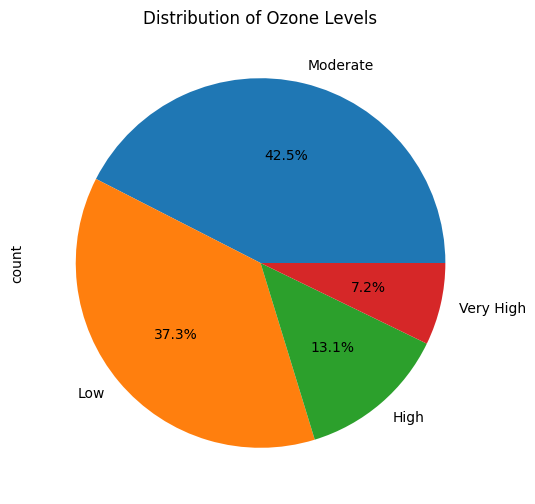

Selected Features: Index(['Solar.R', 'Wind', 'Temp'], dtype='object')
SVM Accuracy: 0.45161290322580644
Logistic Regression Accuracy: 0.41935483870967744


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

data = pd.read_csv('airquality.csv')


data = data.fillna(data.mean())


data['Ozone_Category'] = pd.cut(data['Ozone'], bins=[0, 30, 60, 90, float('inf')],
                                 labels=['Low', 'Moderate', 'High', 'Very High'])


data.dropna(subset=['Ozone_Category'], inplace=True)

scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=np.number).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

plt.figure(figsize=(6, 6))
data['Ozone_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Ozone Levels')
plt.show()


X = data[['Solar.R', 'Wind', 'Temp', 'Month', 'Day']]
y = data['Ozone_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)




estimator = SVC(kernel='linear')
selector = RFE(estimator, n_features_to_select=3)
selector = selector.fit(X_train, y_train)
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_selected, y_train)
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test_selected))
print("SVM Accuracy:", svm_accuracy)

lr_model = LogisticRegression()
lr_model.fit(X_train_selected, y_train)
lr_accuracy = accuracy_score(y_test, lr_model.predict(X_test_selected))
print("Logistic Regression Accuracy:", lr_accuracy)